In [3]:
# Let's first import our packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
# Lets import our dataset
df = pd.read_csv('Autolib_dataset.csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [5]:
df.columns.values.tolist() # to view the column of this dataframe

['Address',
 'Cars',
 'Bluecar counter',
 'Utilib counter',
 'Utilib 1.4 counter',
 'Charge Slots',
 'Charging Status',
 'City',
 'Displayed comment',
 'ID',
 'Kind',
 'Geo point',
 'Postal code',
 'Public name',
 'Rental status',
 'Scheduled at',
 'Slots',
 'Station type',
 'Status',
 'Subscription status',
 'year',
 'month',
 'day',
 'hour',
 'minute']

In [6]:
df.shape # To check the spe of our dataframe

(5000, 25)

From this we can see that the shape of our datas is in the form of 5000 rows and 25 columns

In [ ]:
# Let's now inspect the datatypes
df.dtypes

Address                object
Cars                    int64
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [7]:
non_missing = df.count() #Counts the number of non-missing values in the data frame
print('The total non-missing values: ',non_missing)

The total non-missing values:  Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64


In [8]:
missing_values = np.count_nonzero(df.isnull())  # Counts the missing values in the dataframe
print('The total number of missing values:',missing_values)

The total number of missing values: 9842


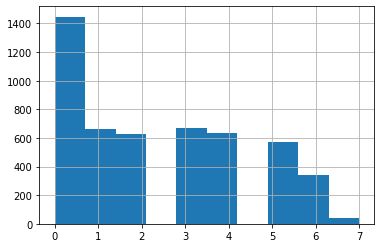

In [9]:
df['Bluecar counter'].hist() # Histogram to visualise the Bluecar counter distribution

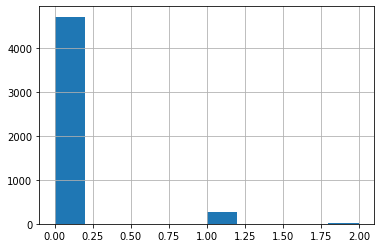

In [10]:
df['Utilib counter'].hist() # Histogram to visualise the Utilib counter distribution

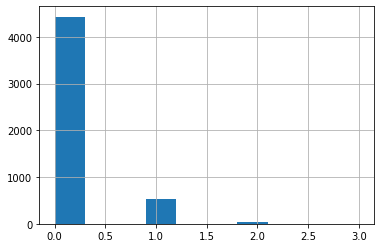

In [11]:
df['Utilib 1.4 counter'].hist() # Histogram to visualise the Utilib 1.4 counter distribution

In [12]:
# Let's now drop the unwanted columns
df.drop(['Displayed comment','Scheduled at', 'month'], axis=1, inplace=True)
df.isnull().sum() # Check the sum of the missing values

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
day                    0
hour                   0
minute                 0
dtype: int64

In [13]:
df.shape

(5000, 22)

In [14]:
# Let's now remove the white spaces in the columns of the dataframe
df_columns = df.columns.str.replace(' ', '_')
df_columns

Index(['Address', 'Cars', 'Bluecar_counter', 'Utilib_counter',
       'Utilib_1.4_counter', 'Charge_Slots', 'Charging_Status', 'City', 'ID',
       'Kind', 'Geo_point', 'Postal_code', 'Public_name', 'Rental_status',
       'Slots', 'Station_type', 'Status', 'Subscription_status', 'year', 'day',
       'hour', 'minute'],
      dtype='object')

In [15]:
df['Kind'].unique()

array(['STATION', 'PARKING', 'SPACE', 'CENTER'], dtype=object)

In [16]:
df.sort_index()
df.head(7)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,8,18,20


In [18]:
# Now lets create a new column that counts the total number of cars at a particular station
df['total_cars'] = df['Bluecar counter'] + df['Utilib 1.4 counter'] + df['Utilib counter']
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,day,hour,minute,total_cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,8,11,43,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,6,7,24,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,3,20,14,5
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,37,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,8,17,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,6,11,26,2
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,16,56,4
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,1,7,1,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,17,27,2


In [98]:
# Let's find the most popular hour for returning cars
popular_hour = df.groupby(['hour'])['total_cars'].sum().sort_values(ascending=False)
popular_hour.head(1)

hour
6    654
Name: total_cars, dtype: int64

From this we can ss that the most popular hour was at 6pm

In [69]:
# Let's now find the most popular station overally which is the one with the most number of vehicles.
popular_station = df.groupby(['Public name'])['total_cars'].sum().sort_values(ascending=False)
popular_station.head(1)

Public name
Paris/Porte de Montrouge/8    50
Name: total_cars, dtype: int64

We can see that the most popular station was 'Paris/Porte de Montrouge/8 ' with 50 cars overally.

In [100]:
# Let's now find the most popular picking station at the most popular hour
pop_picking_station = df.groupby(['Public name'])['hour'] == '6'

AttributeError: ignored

In [93]:
# Let's find most popular postcode for picking up blue cars
popular_postal = df.groupby(['Postal code'])['Bluecar counter'].sum().sort_values(ascending=True)
popular_postal.head(1)

Postal code
78280    0
Name: Bluecar counter, dtype: int64